In [1]:
import pandas as pd

In [2]:
FluTrain = pd.read_csv('FluTrain.csv')

In [3]:
FluTrain.head()

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


####  Looking at the time period 2004-2011, which week corresponds to the highest percentage of ILI-related physician visits?

18-Oct-2009

In [4]:
FluTrain['ILI'].idxmax()

302

In [5]:
FluTrain.loc[FluTrain['ILI'].idxmax()]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

#### Which week corresponds to the highest percentage of ILI-related query fraction?

In [6]:
FluTrain.loc[FluTrain['Queries'].idxmax()]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

In [7]:
FluTrain.dtypes

Week        object
ILI        float64
Queries    float64
dtype: object

#### Let us now understand the data at an aggregate level. Plot the histogram of the dependent variable, ILI. What best describes the distribution of values of ILI?

- Most of the ILI values are small, with a relatively small number of much larger values (in statistics, this sort of data is called "skew right").
- The ILI values are balanced, with equal numbers of unusually large and unusually small values.
- Most of the ILI values are large, with a relatively small number of much smaller values (in statistics, this sort of data is called "skew left").

*Most of the ILI values are small, with a relatively small number of much larger values (in statistics, this sort of data is called "skew right").*

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

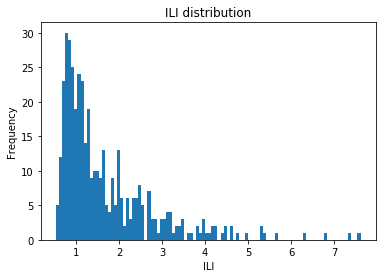

In [13]:
plt.hist(FluTrain['ILI'], bins = 100)
plt.xlabel("ILI")
plt.ylabel('Frequency')
plt.title('ILI distribution')

#### When handling a skewed dependent variable, it is often useful to predict the logarithm of the dependent variable instead of the dependent variable itself -- this prevents the small number of unusually large or small observations from having an undue influence on the sum of squared errors of predictive models. In this problem, we will predict the natural log of the ILI variable.

#### Plot the natural logarithm of ILI versus Queries. What does the plot suggest?.

- There is a negative, linear relationship between log(ILI) and Queries.
- There is no apparent linear relationship between log(ILI) and Queries.
- There is a positive, linear relationship between log(ILI) and Queries.

*There is a positive, linear relationship between log(ILI) and Queries.*

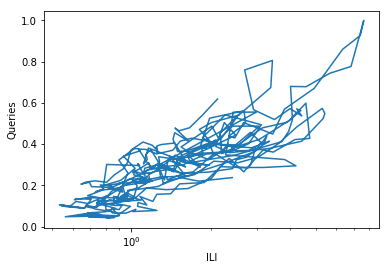

In [14]:
#plt.plot(x=FluTrain['ILI'], y = FluTrain['Queries'])
fig = plt.figure()
ax = plt.gca()
ax.plot(FluTrain['ILI'], FluTrain['Queries'])
ax.set_xscale('log')
plt.xlabel('ILI')
plt.ylabel('Queries')

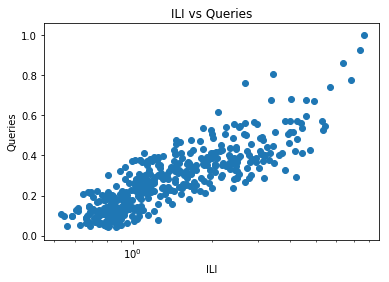

In [15]:
plt.scatter(FluTrain['ILI'], FluTrain['Queries'])
plt.xscale('log')
plt.xlabel('ILI')
plt.ylabel('Queries')
plt.title('ILI vs Queries')

#### Based on the plot we just made, it seems that a linear regression model could be a good modeling choice. Based on our understanding of the data from the previous subproblem, which model best describes our estimation problem?

- ILI = intercept + coefficient x Queries, where the coefficient is negative
- Queries = intercept + coefficient x ILI, where the coefficient is negative
- ILI = intercept + coefficient x Queries, where the coefficient is positive
- Queries = intercept + coefficient x ILI, where the coefficient is positive
- log(ILI) = intercept + coefficient x Queries, where the coefficient is negative
- Queries = intercept + coefficient x log(ILI), where the coefficient is negative
- log(ILI) = intercept + coefficient x Queries, where the coefficient is positive
- Queries = intercept + coefficient x log(ILI), where the coeffcient is positive

*log(ILI) = intercept + coefficient x Queries, where the coefficient is positive*

In [16]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()

In [17]:
import numpy as np

In [25]:
X_train = FluTrain['Queries'].values.reshape((len(FluTrain['Queries']), 1))
y_train = pd.DataFrame(np.log(FluTrain['ILI']))
#linear_regression.fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)

(417, 1)
(417, 1)


In [26]:
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linear_regression.residues_

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


array([ 37.23120641])

\begin{equation*}
SSE (Sum of Squared Errors)   = 37.23120641
\end{equation*}

In [29]:
import math

In [30]:
RMSE = math.sqrt(linear_regression.residues_[0] / len(FluTrain))
RMSE

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


0.29880339458256205

\begin{equation*}
RMSE (Root Mean Squared Error)   = 0.29880339458256205
\end{equation*}

#### What is the training set R-squared value for FluTrend1 model (the "Multiple R-squared")?

0.709020055

In [28]:
linear_regression.score(X_train, y_train)

0.70902005534818646

\begin{equation*}
R^2   = 0.709020055
\end{equation*}

#### For a single variable linear regression model, there is a direct relationship between the R-squared and the correlation between the independent and the dependent variables. What is the relationship we infer from our problem? 

- R-squared = Correlation^2
- R-squared = log(1/Correlation)
- R-squared = exp(-0.5*Correlation)

*R-squared = Correlation^2*

In [33]:
FluTrain['ILI'].corr(FluTrain['Queries'])

0.81421151130322911

In [35]:
FluTrain['Queries'].corr(np.log(FluTrain['ILI']))

0.84203328636591723

In [36]:
FluTrain.corr()

,ILI,Queries
ILI,1.000000,0.814212
Queries,0.814212,1.000000


In [39]:
from scipy.stats.stats import pearsonr
print(pearsonr(X_train, y_train))

(array([ 0.84203329]), array([  2.62109684e-113]))


In [41]:
correlation_squared = .842033286 * .842033286
correlation_squared

0.7090200547319578

#### This is close to the R^2 value

#### The csv file FluTest.csv provides the 2012 weekly data of the ILI-related search queries and the observed weekly percentage of ILI-related physician visits.

#### Normally, we would obtain test-set predictions from the model 'linear_regression' using the code

    linear_regression.predict()

#### However, the dependent variable in our model is log(ILI), so predicted_values would contain predictions of the log(ILI) value. We are instead interested in obtaining predictions of the ILI value. We can convert from predictions of log(ILI) to predictions of ILI via exponentiation, or the exp() function. The new code, which predicts the ILI value, is

np.exp(linear_regression.predict(X_test))

#### What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012? 

In [42]:
FluTest = pd.read_csv('FluTest.csv')

In [43]:
X_test = FluTest['Queries'].values.reshape((len(FluTest['Queries']), 1))
y_test = pd.DataFrame(np.log(FluTest['ILI']))
#linear_regression.fit(X_train, y_train)
print(X_test.shape)
print(y_test.shape)

(52, 1)
(52, 1)


In [46]:
predicted_values = np.exp(linear_regression.predict(X_test))

In [49]:
FluTest

,Week,ILI,Queries
0,2012-01-01 - 2012-01-07,1.766707,0.593625
1,2012-01-08 - 2012-01-14,1.543401,0.499336
2,2012-01-15 - 2012-01-21,1.647615,0.500664
3,2012-01-22 - 2012-01-28,1.684297,0.479416
4,2012-01-29 - 2012-02-04,1.863542,0.471448
5,2012-02-05 - 2012-02-11,1.864079,0.503320
6,2012-02-12 - 2012-02-18,2.019927,0.513944
7,2012-02-19 - 2012-02-25,2.103851,0.500664
8,2012-02-26 - 2012-03-03,2.095549,0.460823
9,2012-03-04 - 2012-03-10,2.103983,0.458167


In [53]:
FluTest.loc[FluTest['Week'] == '2012-03-11 - 2012-03-17']

,Week,ILI,Queries
10,2012-03-11 - 2012-03-17,2.293422,0.432935


In [50]:
predicted_values[10]

array([ 2.18737772])

#### What is the relative error betweeen the estimate (our prediction) and the observed value for the week of March 11, 2012? Note that the relative error is calculated as,

<br>

<font color = 'green'> (Observed ILI - Estimated ILI)/Observed ILI </font>

In [54]:
relative_error = (2.293422 - 2.18737772) / 2.293422
relative_error

0.04623845066455274

#### What is the Root Mean Square Error (RMSE) between our estimates and the actual observations for the percentage of ILI-related physician visits, on the test set?

In [55]:
from sklearn.metrics import mean_squared_error

In [62]:
mse = mean_squared_error(np.exp(y_test), predicted_values)
print("Mean squared error: ", mse)

Mean squared error:  0.561097665762


In [63]:
rmse = math.sqrt(mean_squared_error(np.exp(y_test), predicted_values))
print("Root mean squared error: ", rmse)

Root mean squared error:  0.7490645271019668


#### Alternatively, it can be calculated as follows:

The RMSE can be calculated by first computing the SSE:

SSE = sum((predictedValues-FluTest['ILI'])^2)

and then dividing by the number of observations and taking the square root:

RMSE = sqrt(SSE / len(FluTest))

In other words, sqrt(sum((predictedValues - FluTest['ILI'])^2))

#### Resources:

- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
- https://www.siyavula.com/read/maths/grade-11/statistics/11-statistics-05
- http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
- http://www.endmemo.com/program/R/exp.php
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp2.html
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html
- http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
